In [1]:
# hello this is het and welcome to my project :)

In [2]:
# importing libraries we will need 
import torch
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical

In [3]:
import os
import cv2

In [4]:
# creating a directory for storage
directory = "C:\\Users\\HET\\Downloads\\mp\\dataset\\images"
image_files = os.listdir(directory)

images = []
for file in image_files:
    if file.endswith(".jpg"): 
        img_path = os.path.join(dataset_directory, file)
        img = Image.open(img_path)
        images.append(img)

In [5]:
train = pd.read_csv("C:\\Users\\HET\\Downloads\\mp\\dataset\\Train_CSV.csv")

In [6]:
test = pd.read_csv("C:\\Users\\HET\\Downloads\\mp\\dataset\\Test_CSV.csv")

In [7]:
validation = pd.read_csv("C:\\Users\\HET\\Downloads\\mp\\dataset\\Validation_CSV.csv")

In [8]:
train.head()

,JPG,LABELS
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [9]:
test.head()

,JPG,LABELS
0,calibrated/0830MR0036510000500684E01_DRCL.JPG,7
1,calibrated/0640MH0002640000203781I01_DRCL.JPG,24
2,calibrated/0647MH0003250050203806E01_DRCL.JPG,9
3,calibrated/0844MR0037590000501001I01_DRCL.JPG,7
4,calibrated/0618MR0026460020401253I01_DRCL.JPG,11


In [10]:
validation.head()

,JPG,LABELS
0,calibrated/0292MH0002810020103587C00_DRCL.JPG,5
1,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
2,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
3,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
4,calibrated/0292MH0002810020103613C00_DRCL.JPG,5


In [11]:
# mapping the text from the files to the actual image
def newpathfunc(pathjpg,labeljpg,listjpg,listlabel,splitter = "calibrated"):
    
    for imgpath, labelpath in zip(pathjpg,labeljpg):
        ID_pathing,exporting_type = imgpath.split(splitter)
        newpath = "C:\\Users\\HET\\Downloads\\mp\\dataset\\images" + str(exporting_type)
        listjpg.append(newpath)
        listlabel.append(labelpath)

In [12]:
newpathtrain = []
newlabeltrain = []
splitter = "calibrated"

newpathfunc(train.JPG,train.LABELS,newpathtrain,newlabeltrain,splitter)

In [13]:
newpathtest = []
newlabeltest = []
splitter = "calibrated"

newpathfunc(test.JPG,test.LABELS,newpathtest,newlabeltest,splitter)

In [14]:
newpathval = []
newlabelval = []
splitter = "calibrated"

newpathfunc(validation.JPG,validation.LABELS,newpathval,newlabelval,splitter)

In [15]:
trainjpgseries = pd.Series(newpathtrain,name="image").astype(str)
trainlabelseries = pd.Series(newlabeltrain,name="CATEGORY")

In [16]:
testjpgseries = pd.Series(newpathtest,name="image").astype(str)
testlabelseries = pd.Series(newlabeltest,name="CATEGORY")

In [17]:
valjpgseries = pd.Series(newpathval,name="image").astype(str)
vallabelseries = pd.Series(newlabelval,name="CATEGORY")

In [18]:
finaltrain = pd.concat([trainjpgseries,trainlabelseries],axis=1)

In [19]:
finaltest = pd.concat([testjpgseries,testlabelseries],axis=1)

In [20]:
finalvalidation = pd.concat([valjpgseries,vallabelseries],axis=1)

In [21]:
listf = [finaltrain,finaltest,finalvalidation]
final = pd.concat(listf)

In [22]:
final.head()

,image,CATEGORY
0,C:\Users\HET\Downloads\mp\dataset\images/0077M...,15
1,C:\Users\HET\Downloads\mp\dataset\images/0072M...,8
2,C:\Users\HET\Downloads\mp\dataset\images/0069M...,21
3,C:\Users\HET\Downloads\mp\dataset\images/0154M...,8
4,C:\Users\HET\Downloads\mp\dataset\images/0019M...,8


In [23]:
final = final.sample(frac = 1).reset_index(drop = True)

In [24]:
final.head()

,image,CATEGORY
0,C:\Users\HET\Downloads\mp\dataset\images/0284M...,17
1,C:\Users\HET\Downloads\mp\dataset\images/0065M...,16
2,C:\Users\HET\Downloads\mp\dataset\images/0013M...,8
3,C:\Users\HET\Downloads\mp\dataset\images/0003M...,8
4,C:\Users\HET\Downloads\mp\dataset\images/0078M...,8


In [25]:
# doing the same again but for the additional images 
from pathlib import Path
additionalpath = Path("C:\\Users\\HET\\Downloads\\mp\\dataset\\additional_images")

In [26]:
additionaljpglist = list(additionalpath.glob(r"*.jpg"))

In [27]:
additionaljpgseries = pd.Series(additionaljpglist,name="image").astype(str)

In [28]:
additionaljpgseries = additionaljpgseries[0:2000]

In [29]:
Transformed_X = []

for X_image in additionaljpgseries:
    
    One_Image = cv2.cvtColor(cv2.imread(X_image),cv2.COLOR_BGR2RGB)
    One_Image = cv2.resize(One_Image,(180,180))
    One_Image = One_Image / 255.0
    Transformed_X.append(One_Image)

In [30]:
additionaltrain = np.array(Transformed_X)

In [31]:
# creating training and test data
X_Train,X_Test = train_test_split(final,train_size=0.9,random_state=42,shuffle=True)

In [32]:
print(X_Train.shape)
print(X_Test.shape)
print(additionaltrain.shape)

(6021, 2)
(670, 2)
(2000, 180, 180, 3)


In [33]:
Validation_Set = X_Train[5000:6021]

In [34]:
X_Train = X_Train[0:2000]

In [35]:
Validation_Set = Validation_Set.reset_index()

In [36]:
print(X_Train.shape)

(2000, 2)


In [37]:
print(X_Test.shape)

(670, 2)


In [38]:
print(Validation_Set.shape)

(1021, 3)


In [39]:
print(X_Train.CATEGORY.value_counts())

8     806
24    293
5     137
9     122
10     78
21     73
3      59
7      52
23     51
17     41
14     39
12     39
15     33
0      26
20     23
16     23
19     21
2      19
13     19
4      18
6      14
1       5
18      5
11      4
Name: CATEGORY, dtype: int64


In [40]:
# scaling and normalizing the images 
Transformed_Y_Train = []
Transformed_Y_Train_Labels = []

for Y_image, Y_labels in zip(X_Train.image,X_Train.CATEGORY):
    
    Y_image = cv2.cvtColor(cv2.imread(Y_image),cv2.COLOR_BGR2RGB)
    Y_image = cv2.resize(Y_image,(180,180))
    Y_image = Y_image / 255.0
    Transformed_Y_Train.append(Y_image)
    Transformed_Y_Train_Labels.append(Y_labels)

In [41]:
Y_S_Train_Img = np.array(Transformed_Y_Train)
Y_S_Train_Labels = to_categorical(Transformed_Y_Train_Labels)

In [42]:
print(Y_S_Train_Img.shape)
print(Y_S_Train_Labels.shape)
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras import models
from keras.models import Model

(2000, 180, 180, 3)
(2000, 25)


In [43]:
# architecture of my model 

Input_Layer = tf.keras.Input(shape=(180,180,3))
x = Conv2D(32,(3,3),activation="relu",padding="same")(Input_Layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(2,2),activation="relu",padding="same")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(256,(2,2),activation="relu",padding="same")(x)
x = GlobalMaxPooling2D()(x)
x = Dense(128,activation="relu")(x)
x = Dropout(0.5)(x)
class_prediction_layer = Dense(25,activation="softmax",name="class-prediction")(x)

encoder = Dense(128,activation="relu")(Input_Layer)
encoder = Dense(64,activation="relu")(encoder)
encoder = Dense(32,activation="relu")(encoder)

decoder = Dense(64,input_shape=[32],activation="relu")(encoder)
decoder = Dense(128,activation="relu")(decoder)
ae_output = Dense(3,activation="sigmoid",name="AE_OUTPUT")(decoder)

In [44]:
Configure_Model = Model(Input_Layer,[class_prediction_layer,ae_output])

In [45]:
print(Configure_Model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 180, 180, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 90, 90, 64)           18496     ['max_pooling2d[0][0]']   

In [46]:
Configure_Model.compile(optimizer="adam",loss={"class-prediction":"categorical_crossentropy",
                                              "AE_OUTPUT":"binary_crossentropy"},metrics=["accuracy"])

In [47]:
Model_Configure_Total = Configure_Model.fit(Y_S_Train_Img,
                    [Y_S_Train_Labels,additionaltrain],
                    epochs=1,
                    batch_size=64,
                    )

32/32 [==============================] - 155s 5s/step - loss: 3.3404 - class-prediction_loss: 2.6623 - AE_OUTPUT_loss: 0.6781 - class-prediction_accuracy: 0.3520 - AE_OUTPUT_accuracy: 0.9916


In [48]:
# part 2 generating new images with my GAN
directory2 = "C:\\Users\\HET\\Downloads\\mp"
print(os.listdir(directory2))

['dataset']


In [49]:
# default settings for working with GANs on tensorflow 

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [50]:

device = get_default_device()
device

device(type='cpu')

In [51]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [52]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [53]:
# creating a training dataset for the discriminator to learn from 
train_ds = ImageFolder(directory2, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [54]:
import torch.nn as nn

In [55]:
# architecture of discriminator (same as that of a classifier)
discriminator = nn.Sequential(
    # input size = 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # output size = 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # output size = 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # output size = 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # output size = 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # output size = 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

In [56]:
# size of the latent space 
latent_size = 128

In [57]:
# architecture of the generator (just a normal neural network)
generator = nn.Sequential(
    # input size = latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # output size = 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # output size = 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # output size =  128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # output size = 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # output size = 3 x 64 x 64
)

In [58]:
# training my discriminator from the real set I created above 
def train_discriminator(real_images, opt_d):
    # clearing default gradients before I proceed
    opt_d.zero_grad()

    # training with real images 
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # generating some fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # passing those fake images 
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # updating weights 
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [59]:
def train_generator(opt_g):
    # clearing default gradients 
    opt_g.zero_grad()
    
    # generation of fake images 
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # passing fakes through discriminator and finding how it's handling it 
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # updating weights 
    loss.backward()
    opt_g.step()
    
    return loss.item()

In [60]:
from torchvision.utils import save_image

In [61]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [62]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(110, 110))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [63]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [64]:
# fitting of my model 
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # all the losses and scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # adam optimizer
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            
            loss_g = train_generator(opt_g)
            
        # losses and scores 
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # saving my images 
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

In [65]:
# latent I will use while testing 
import torch
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device) 
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]
lr = 0.0002
epochs = 30


In [66]:
history = fit(epochs, lr)

  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [1/30], loss_g: 3.0962, loss_d: 0.3866, real_score: 0.8418, fake_score: 0.1812
Saving generated-images-0001.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [2/30], loss_g: 4.5011, loss_d: 0.1873, real_score: 0.9411, fake_score: 0.1110
Saving generated-images-0002.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [3/30], loss_g: 5.7655, loss_d: 0.3798, real_score: 0.9251, fake_score: 0.2468
Saving generated-images-0003.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [4/30], loss_g: 3.5971, loss_d: 0.1119, real_score: 0.9320, fake_score: 0.0376
Saving generated-images-0004.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [5/30], loss_g: 4.6927, loss_d: 0.1585, real_score: 0.8687, fake_score: 0.0097
Saving generated-images-0005.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [6/30], loss_g: 7.1916, loss_d: 0.1420, real_score: 0.8990, fake_score: 0.0009
Saving generated-images-0006.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [7/30], loss_g: 3.5564, loss_d: 0.1621, real_score: 0.9229, fake_score: 0.0727
Saving generated-images-0007.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [8/30], loss_g: 5.3963, loss_d: 0.0614, real_score: 0.9493, fake_score: 0.0084
Saving generated-images-0008.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [9/30], loss_g: 6.8074, loss_d: 0.1655, real_score: 0.8564, fake_score: 0.0047
Saving generated-images-0009.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [10/30], loss_g: 6.5614, loss_d: 0.0100, real_score: 0.9918, fake_score: 0.0017
Saving generated-images-0010.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [11/30], loss_g: 7.7335, loss_d: 0.1845, real_score: 0.8398, fake_score: 0.0005
Saving generated-images-0011.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [12/30], loss_g: 7.2892, loss_d: 0.3090, real_score: 0.9926, fake_score: 0.2465
Saving generated-images-0012.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [13/30], loss_g: 7.4769, loss_d: 0.5126, real_score: 0.9913, fake_score: 0.3743
Saving generated-images-0013.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [14/30], loss_g: 4.3775, loss_d: 0.0241, real_score: 0.9841, fake_score: 0.0074
Saving generated-images-0014.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [15/30], loss_g: 5.4758, loss_d: 0.1402, real_score: 0.9264, fake_score: 0.0245
Saving generated-images-0015.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [16/30], loss_g: 5.3671, loss_d: 0.0431, real_score: 0.9711, fake_score: 0.0132
Saving generated-images-0016.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [17/30], loss_g: 5.5512, loss_d: 0.4203, real_score: 0.9512, fake_score: 0.2832
Saving generated-images-0017.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [18/30], loss_g: 7.0778, loss_d: 0.0224, real_score: 0.9806, fake_score: 0.0026
Saving generated-images-0018.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [19/30], loss_g: 3.0901, loss_d: 0.2666, real_score: 0.8070, fake_score: 0.0308
Saving generated-images-0019.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [20/30], loss_g: 3.4647, loss_d: 0.6553, real_score: 0.5614, fake_score: 0.0144
Saving generated-images-0020.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [21/30], loss_g: 4.4701, loss_d: 0.0980, real_score: 0.9505, fake_score: 0.0445
Saving generated-images-0021.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [22/30], loss_g: 5.6943, loss_d: 0.0784, real_score: 0.9800, fake_score: 0.0547
Saving generated-images-0022.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [23/30], loss_g: 3.7758, loss_d: 0.0610, real_score: 0.9586, fake_score: 0.0174
Saving generated-images-0023.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [24/30], loss_g: 7.2233, loss_d: 0.1067, real_score: 0.9919, fake_score: 0.0870
Saving generated-images-0024.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [25/30], loss_g: 11.8836, loss_d: 0.9184, real_score: 0.9946, fake_score: 0.5294
Saving generated-images-0025.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [26/30], loss_g: 6.3281, loss_d: 0.2488, real_score: 0.9953, fake_score: 0.2038
Saving generated-images-0026.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [27/30], loss_g: 5.9423, loss_d: 3.0251, real_score: 0.1488, fake_score: 0.0000
Saving generated-images-0027.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [28/30], loss_g: 3.1772, loss_d: 0.0176, real_score: 0.9977, fake_score: 0.0149
Saving generated-images-0028.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [29/30], loss_g: 5.9167, loss_d: 0.0235, real_score: 0.9853, fake_score: 0.0072
Saving generated-images-0029.png


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch [30/30], loss_g: 6.9736, loss_d: 0.0238, real_score: 0.9791, fake_score: 0.0023
Saving generated-images-0030.png


In [67]:
# displaying my images at every 10th iteration 

from IPython.display import Image

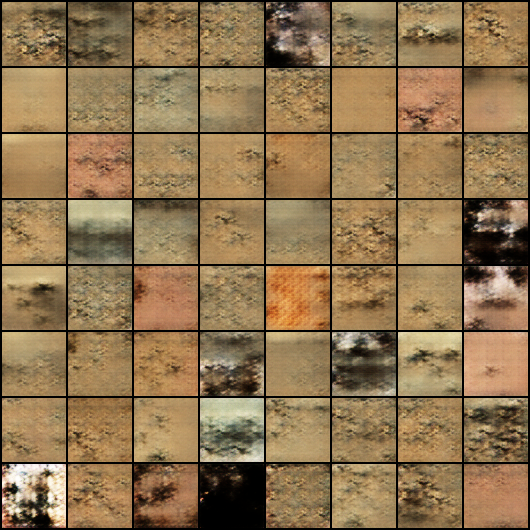

In [69]:
Image('./generated/generated-images-0010.png')

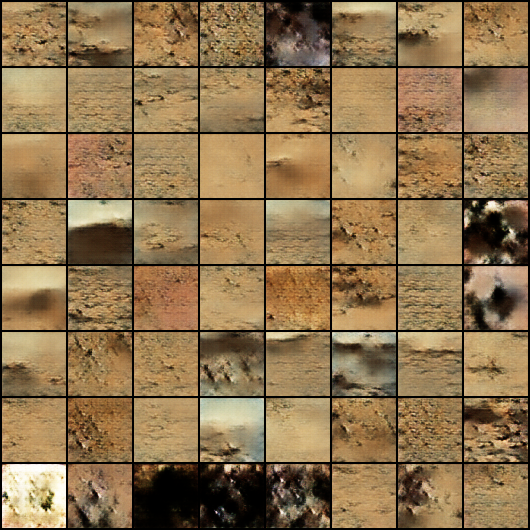

In [70]:
Image('./generated/generated-images-0020.png')

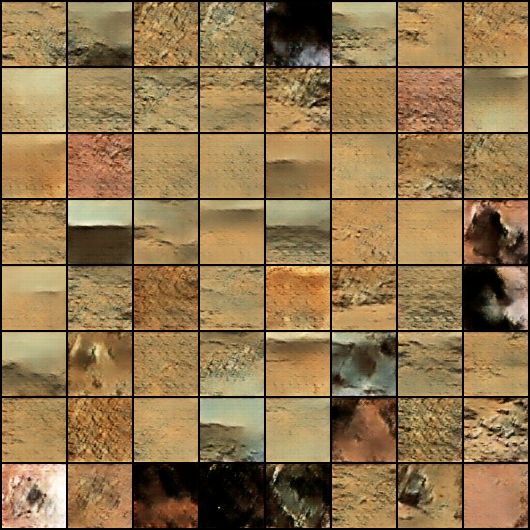

In [71]:
Image('./generated/generated-images-0030.png')